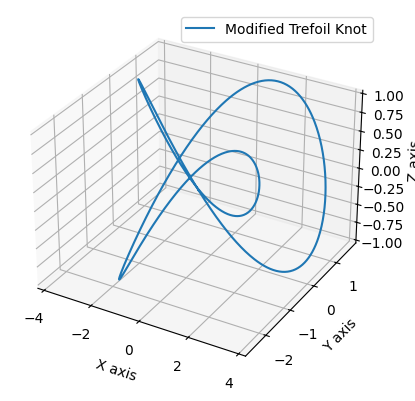

In [133]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False


# Define the modified trefoil knot parameterization
def trefoil_knot(t):
    x = np.sin(t) + 3 * np.sin(2 * t)
    y = np.cos(t) - 1.5 * np.cos(2 * t)
    z = -np.sin(3 * t)
    return x, y, z

# Generate the data
t = np.linspace(0, 2 * np.pi, 1000)
x, y, z = trefoil_knot(t)

# Enable interactive mode
plt.ion()

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Modified Trefoil Knot")
ax.legend()

# Set labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Show the plot
plt.show()


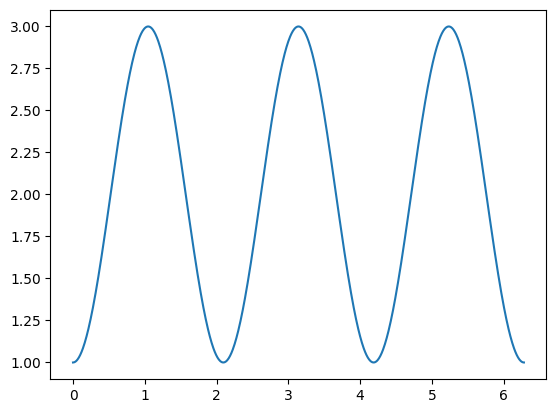

In [18]:
t = np.linspace(0, 2 * np.pi, 1000)
loop_lower_bound = 0
loop_upper_bound = 2 * np.pi/3
blow_up_factor = 3
loop = 1 + (blow_up_factor - 1) * (np.sin((t - loop_lower_bound) * np.pi / (loop_upper_bound - loop_lower_bound)))**2

plt.plot(t, loop)


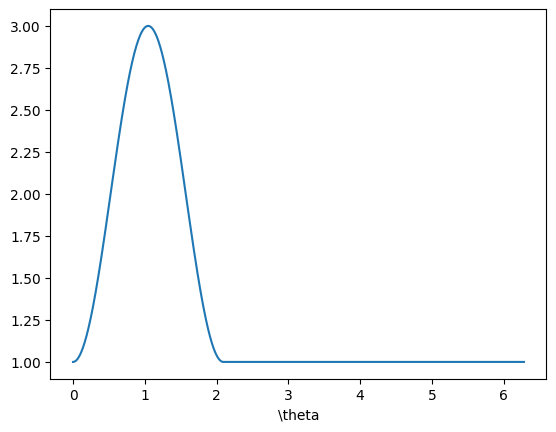

In [119]:
multiplicative_factor = (t >= loop_lower_bound) * (t <= loop_upper_bound) * loop  + ((t < loop_lower_bound) + (t > loop_upper_bound))
plt.plot(t, multiplicative_factor)
plt.xlabel(r"\theta")
plt.show()

In [135]:
def trefoil_knot(t, loop_lower_bound, loop_upper_bound, blow_up_factor):
    """
    Return the parameterization of the modified trefoil knot.

    Parameters
    ----------
    t : float
        The angle parameter, between 0 and 2 * np.pi.
    loop_lower_bound : float
        The lower bound on t of the loop to blow up the trefoil knot.
    loop_upper_bound : float
        The upper bound on t of the loop to blow up the trefoil knot.
    blow_up_factor : float
        The factor to blow up the loop by
    """
    
    # first specify a function that is 1 at loop_lower_bound and 1 at loop_upper_bound, and grows to blow_up_factor in between
    loop = 1 + (blow_up_factor - 1) * (np.sin((t - loop_lower_bound) * np.pi / (loop_upper_bound - loop_lower_bound)))**2
    multiplicative_factor = (t >= loop_lower_bound) * (t <= loop_upper_bound) * loop  + ((t < loop_lower_bound) + (t > loop_upper_bound))
    # then specify the trefoil knot

    x = np.sin(t) + 2 * np.sin(2 * t)
    y = np.cos(t) - 2 * np.cos(2 * t)
    z = -np.sin(3 * t)

    x = x * multiplicative_factor
    y = y * multiplicative_factor
    z = z * multiplicative_factor

    return x, y, z

In [34]:
def resample_1_manifold(x, y, z, num_points):
    # Compute the cumulative arc length
    points = np.column_stack((x, y, z))
    distances = np.linalg.norm(np.diff(points, axis=0), axis=1)
    cumulative_length = np.hstack(([0], np.cumsum(distances)))
    
    # Create the new uniform cumulative arc length
    new_length = np.linspace(0, cumulative_length[-1], num_points)
    
    # Interpolate x, y, z coordinates based on the new cumulative length
    x_resampled = np.interp(new_length, cumulative_length, x)
    y_resampled = np.interp(new_length, cumulative_length, y)
    z_resampled = np.interp(new_length, cumulative_length, z)
    
    return x_resampled, y_resampled, z_resampled

In [117]:
import numpy as np
import plotly.graph_objs as go

# Define the modified trefoil knot parameterization
# def trefoil_knot(t):
#     x = np.sin(t) + 3 * np.sin(2 * t)
#     y = np.cos(t) - 1.5 * np.cos(2 * t)
#     z = -np.sin(3 * t)
#     return x, y, z

# Generate the data
t = np.linspace(0, 2 * np.pi, 1000)
x, y, z = trefoil_knot(t, 0, 2 * np.pi/3, 10)
x, y, z = resample_1_manifold(x, y, z, 1000)

# Create hovertext with t values
hover_text = [f"t: {ti:.2f}" for ti in t]

# Create a plotly figure with colors mapped to t values
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(
        color=t,  # Use t values for color
        colorscale='Viridis',  # Colormap
        width=4
    ),
    name="Modified Trefoil Knot",
    text=hover_text,  # Add hover text
    hoverinfo='text'  # Display hover text only
)])

# Set the layout
fig.update_layout(
    scene=dict(
        xaxis_title='X axis',
        yaxis_title='Y axis',
        zaxis_title='Z axis'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()


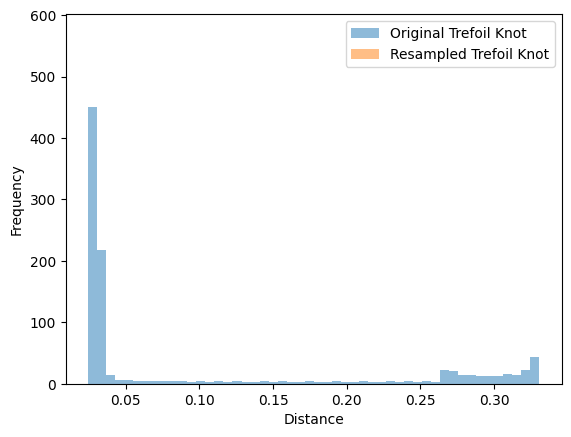

In [43]:
# compare the distribution of distances between points on the trefoil knot and the distribution of distances between points on the resampled trefoil knot
x_original, y_original, z_original = trefoil_knot(t, 0, 2 * np.pi/3, 10)
x_resampled, y_resampled, z_resampled = resample_1_manifold(x_original, y_original, z_original, 1000)

# Compute the distances between points on the original trefoil knot
# use np.diff to compute the difference between consecutive elements of x, y, and z
# use np.linalg.norm to compute the Euclidean distance between points
distances_original = np.linalg.norm(np.diff(np.array([x_original, y_original, z_original]).T, axis=0), axis=1)

# Compute the distances between points on the resampled trefoil knot
distances_resampled = np.linalg.norm(np.diff(np.array([x_resampled, y_resampled, z_resampled]).T, axis=0), axis=1)

# Create a plot with two histograms
plt.hist(distances_original, bins=50, alpha=0.5, label="Original Trefoil Knot")
plt.hist(distances_resampled, bins=50, alpha=0.5, label="Resampled Trefoil Knot")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()



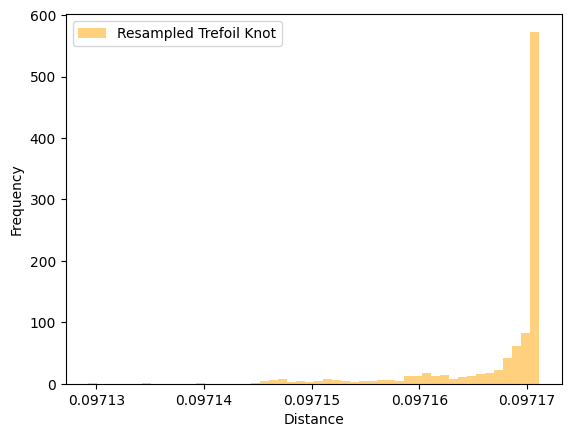

In [45]:
# Generate the original and resampled manifolds
t = np.linspace(0, 2 * np.pi, 1000)
x_original, y_original, z_original = trefoil_knot(t, 0, 2 * np.pi/3, 10)
x_resampled, y_resampled, z_resampled = resample_1_manifold(x_original, y_original, z_original, 1000)

# Compute distances between consecutive points
distances_original = np.linalg.norm(np.diff(np.array([x_original, y_original, z_original]).T, axis=0), axis=1)
distances_resampled = np.linalg.norm(np.diff(np.array([x_resampled, y_resampled, z_resampled]).T, axis=0), axis=1)

# Check for NaN values
if np.isnan(distances_resampled).any():
    print("NaN values found in distances_resampled")

# Plot the histograms
#plt.hist(distances_original, bins=50, alpha=0.5, label="Original Trefoil Knot", color='blue')
plt.hist(distances_resampled, bins=50, alpha=0.5, label="Resampled Trefoil Knot", color='orange')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [46]:
import numpy as np

def sample_segment(points, segment_length, skip_step, total_frames):
    """
    Generate the positions of the segment at each frame for animation.

    Parameters
    ----------
    points : np.ndarray
        The array of points representing the 1-manifold (shape: Nx3).
    segment_length : int
        The number of points in the segment.
    skip_step : int
        The number of points to skip over with each step.
    total_frames : int
        The total number of frames for the animation.

    Returns
    -------
    List[np.ndarray]
        A list of arrays, each representing the segment at a given frame.
    """
    num_points = len(points)
    segment_positions = []

    for frame in range(total_frames):
        start_idx = (frame * skip_step) % num_points
        end_idx = (start_idx + segment_length) % num_points

        if start_idx < end_idx:
            segment_positions.append(points[start_idx:end_idx])
        else:
            # Wrap around to the beginning
            segment_positions.append(np.vstack((points[start_idx:], points[:end_idx])))

    return segment_positions


In [151]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def animate_trefoil(segment_positions, all_points, movie_length, fps=30):
    """
    Animate the trefoil knot with a moving red segment.

    Parameters
    ----------
    segment_positions : List[np.ndarray]
        A list of arrays, each representing the segment at a given frame.
    all_points : np.ndarray
        The array of all points representing the trefoil knot (shape: Nx3).
    movie_length : float
        The length of the movie in seconds.
    fps : int
        The frames per second of the animation.

    Returns
    -------
    FuncAnimation
        The animation object.
    """
    num_frames = len(segment_positions)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1, 1, 1])

    # Plot all points in grey with transparency
    ax.plot(all_points[:, 0], all_points[:, 1], all_points[:, 2], color='grey', alpha=0.5)

    # Red segment that will be animated
    segment, = ax.plot([], [], [], color='red', linewidth=2)

    def update(frame):
        data = segment_positions[frame]
        segment.set_data(data[:, 0], data[:, 1])
        segment.set_3d_properties(data[:, 2])
        return segment,

    anim = FuncAnimation(
        fig, update, frames=num_frames, interval=1000 / fps, blit=True
    )

    plt.close(fig)
    return anim

# Parameters
segment_length = 30
skip_step = 1
total_frames = 500
movie_length = 8  # seconds
fps = total_frames // movie_length
n_points_resampled = 150

# Generate trefoil knot points
t = np.linspace(0, 2 * np.pi, 600)
x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 15)
x, y, z = resample_1_manifold(x, y, z, n_points_resampled)
all_points = np.column_stack((x, y, z))

# Sample segment positions
segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)

# Create the animation
anim = animate_trefoil(segment_positions, all_points, movie_length, fps=fps)

# To display in a Jupyter notebook or save to a file
from IPython.display import HTML
HTML(anim.to_jshtml())  # For Jupyter notebook
anim.save(f'trefoil_animation_{segment_length}_{n_points_resampled}.mp4', fps=fps)


Animation size has reached 21012617 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [56]:
len(segment_positions)

1200

In [ ]:
# use torch ode to learn the dynamics of the trefoil knot

# set device to mps if available



In [51]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def animate_trefoil_plotly(segment_positions, all_points, total_frames):
    """
    Create an interactive 3D animation of the trefoil knot with a moving red segment using Plotly.

    Parameters
    ----------
    segment_positions : List[np.ndarray]
        A list of arrays, each representing the segment at a given frame.
    all_points : np.ndarray
        The array of all points representing the trefoil knot (shape: Nx3).
    total_frames : int
        The total number of frames for the animation.

    Returns
    -------
    go.Figure
        The Plotly figure object with the animation.
    """
    # Create the figure
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

    # Add the static grey trefoil knot
    fig.add_trace(go.Scatter3d(
        x=all_points[:, 0],
        y=all_points[:, 1],
        z=all_points[:, 2],
        mode='lines',
        line=dict(color='grey', width=2),
        opacity=0.5,
        name='Trefoil Knot'
    ))

    # Add the dynamic red segment, initially empty
    segment_trace = go.Scatter3d(
        x=[],
        y=[],
        z=[],
        mode='lines',
        line=dict(color='red', width=4),
        name='Segment'
    )

    fig.add_trace(segment_trace)

    # Create frames for the animation
    frames = [
        go.Frame(
            data=[
                go.Scatter3d(
                    x=segment[:, 0],
                    y=segment[:, 1],
                    z=segment[:, 2],
                    mode='lines',
                    line=dict(color='red', width=4)
                )
            ],
            name=str(k)
        ) for k, segment in enumerate(segment_positions)
    ]

    # Add frames to the figure
    fig.frames = frames

    # Set up the layout for the animation
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        ),
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 50, 'redraw': True}, 'fromcurrent': True}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }]
    )

    return fig

In [52]:
# Parameters
segment_length = 20
skip_step = 1
total_frames = 100

# Generate trefoil knot points
t = np.linspace(0, 2 * np.pi, 1000)
x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 10)
all_points = np.column_stack((x, y, z))

# Sample segment positions
segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)

# Create the Plotly animation
fig = animate_trefoil_plotly(segment_positions, all_points, total_frames)

# Show the figure
fig.show()

In [121]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchdiffeq import odeint

class SegmentDynamics(nn.Module):
    def __init__(self):
        super().__init__()
        self.dynamics_mlp = mlp(input_dim=3, hidden_dim=64, output_dim=3, hidden_depth=2)

    def forward(self, t, state):
        return self.dynamics_mlp(state)

def mlp(input_dim, hidden_dim, output_dim, hidden_depth, act=nn.ReLU):
    if hidden_depth == 0:
        mods = [nn.Linear(input_dim, output_dim)]
    else:
        mods = [nn.Linear(input_dim, hidden_dim), act()]
        for _ in range(hidden_depth - 1):
            mods += [nn.Linear(hidden_dim, hidden_dim), act()]
        mods.append(nn.Linear(hidden_dim, output_dim))
    return nn.Sequential(*mods)


# LinearDynamics class with simple linear layer
class LinearDynamics(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)  # Simple linear layer for dynamics

    def forward(self, t, state):
        return self.linear(state)

# NeuralODE class with configurable dynamics
class NeuralODE(nn.Module):
    def __init__(self, dynamics_type='mlp'):
        super().__init__()
        if dynamics_type == 'mlp':
            self.odefunc = SegmentDynamics()
        elif dynamics_type == 'linear':
            self.odefunc = LinearDynamics()
        else:
            raise ValueError("Unsupported dynamics_type. Use 'mlp' or 'linear'.")

    def forward(self, t, state):
        return self.odefunc(t, state)

    def simulate(self, initial_state, times):
        solution = odeint(self, initial_state, times,
                          atol=1e-8,  # Use Python float instead of torch.tensor
                          rtol=1e-8,  # Use Python float instead of torch.tensor
                          method="dopri5",
                          options={'dtype': torch.float32})
        return solution

In [153]:
def load_segment_data(output_type = "np"):
    # Parameters
    segment_length = 30
    skip_step = 1
    total_frames = 500
    movie_length = 8  # seconds
    fps = total_frames // movie_length

    n_points_resampled = 150

    # Generate trefoil knot points
    t = np.linspace(0, 2 * np.pi, 600)
    x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 15)
    x, y, z = resample_1_manifold(x, y, z, n_points_resampled)
    all_points = np.column_stack((x, y, z))

    # Sample segment positions
    segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)
    pos = np.array(segment_positions)
    t = np.linspace(0, movie_length, total_frames)
    if output_type == "torch":
        return torch.tensor(pos), torch.tensor(t)
    else:
        return pos, t

In [ ]:
# Parameters
segment_length = 30
skip_step = 1
total_frames = 500
movie_length = 8  # seconds
fps = total_frames // movie_length
n_points_resampled = 150

# Generate trefoil knot points
t = np.linspace(0, 2 * np.pi, 600)
x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 15)
x, y, z = resample_1_manifold(x, y, z, n_points_resampled)
all_points = np.column_stack((x, y, z))

In [144]:
pos, t = load_segment_data()
print(pos.shape)
print(t.shape)

torch.Size([500, 30, 3])
torch.Size([500])


In [142]:
pos.shape

torch.Size([1200, 200, 3])

In [131]:
torch.manual_seed(0)
#torch.set_default_dtype(torch.float64)

save = "figs"
num_iterations = 1000
base_lr = 1e-3

# Load the segment positions and times
segment_positions, obs_times = load_segment_data()
initial_state = segment_positions[0]  # Initial state from the data

model = NeuralODE(dynamics_type="linear")
optimizer = torch.optim.Adam(model.parameters(), lr=base_lr)

for itr in range(num_iterations):
    optimizer.zero_grad()
    trajectory = model.simulate(initial_state, obs_times)
    loss = ((trajectory - segment_positions) ** 2).mean()
    loss.backward()
    optimizer.step()

    if itr % 10 == 0:
        print(f"Iteration {itr}, Loss: {loss.item()}")
        # plt.figure()
        # plt.plot(obs_times.numpy(), segment_positions.numpy(), label="Target")
        # plt.plot(obs_times.numpy(), trajectory.detach().numpy(), label="Learned")
        # plt.legend()
        # os.makedirs(save, exist_ok=True)
        # plt.savefig(f"{save}/{itr:05d}.png")
        # plt.close()

    if (itr + 1) % 100 == 0:
        torch.save({'state_dict': model.state_dict()}, f"{save}/model.pt")

Iteration 0, Loss: 117165133.0442879
Iteration 10, Loss: 63324242.640132815
Iteration 20, Loss: 36236434.82997567
Iteration 30, Loss: 22743918.81022818
Iteration 40, Loss: 15629289.841450233
Iteration 50, Loss: 11539196.390797643
Iteration 60, Loss: 8969210.927495921
Iteration 70, Loss: 7224792.119551678
Iteration 80, Loss: 5966751.011310217
Iteration 90, Loss: 5017714.664027275
Iteration 100, Loss: 4277930.351126202
Iteration 110, Loss: 3687196.560864492
Iteration 120, Loss: 3206821.8442363804
Iteration 130, Loss: 2810602.099263984
Iteration 140, Loss: 2480033.880287344
Iteration 150, Loss: 2201616.4687798056
Iteration 160, Loss: 1965241.235173977
Iteration 170, Loss: 1763179.8277604682
Iteration 180, Loss: 1589420.727986469
Iteration 190, Loss: 1439218.7294588382
Iteration 200, Loss: 1308780.1873839998
Iteration 210, Loss: 1195037.9572621814
Iteration 220, Loss: 1095487.3147694606
Iteration 230, Loss: 1008064.3413142604
Iteration 240, Loss: 931054.4978756297
Iteration 250, Loss: 8630

In [140]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
for itr in range(num_iterations):
    optimizer.zero_grad()
    trajectory = model.simulate(initial_state, obs_times)
    loss = ((trajectory - segment_positions) ** 2).mean()
    loss.backward()
    optimizer.step()

    if itr % 10 == 0:
        print(f"Iteration {itr}, Loss: {loss.item()}")
        # plt.figure()
        # plt.plot(obs_times.numpy(), segment_positions.numpy(), label="Target")
        # plt.plot(obs_times.numpy(), trajectory.detach().numpy(), label="Learned")
        # plt.legend()
        # os.makedirs(save, exist_ok=True)
        # plt.savefig(f"{save}/{itr:05d}.png")
        # plt.close()

    if (itr + 1) % 100 == 0:
        torch.save({'state_dict': model.state_dict()}, f"{save}/model.pt")

Iteration 0, Loss: 122.38037261873679
Iteration 10, Loss: 116.12934265494295
Iteration 20, Loss: 111.09201624586166
Iteration 30, Loss: 107.01330190377038
Iteration 40, Loss: 103.6265876513917
Iteration 50, Loss: 100.72649491188278
Iteration 60, Loss: 98.18626707491903
Iteration 70, Loss: 95.92540743849985
Iteration 80, Loss: 93.88730865662723
Iteration 90, Loss: 92.03135698794479
Iteration 100, Loss: 90.3276192601002
Iteration 110, Loss: 88.75316239248417
Iteration 120, Loss: 87.2898297658703
Iteration 130, Loss: 85.92291112599621
Iteration 140, Loss: 84.640314403442
Iteration 150, Loss: 83.43200143990516
Iteration 160, Loss: 82.28958811934342
Iteration 170, Loss: 81.20605785723075
Iteration 180, Loss: 80.17555164355772
Iteration 190, Loss: 79.1932104478777
Iteration 200, Loss: 78.25505541103517
Iteration 210, Loss: 77.35789587175213
Iteration 220, Loss: 76.49925652663003
Iteration 230, Loss: 75.67731567482127
Iteration 240, Loss: 74.89084670883896
Iteration 250, Loss: 74.139154421122

KeyboardInterrupt: 

In [102]:
import torch
import torch.nn as nn

# Check if MPS is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

torch.manual_seed(0)
torch.set_default_dtype(torch.float32)

save = "figs"
num_iterations = 1000
base_lr = 1e-3

# Load the segment positions and times
segment_positions, obs_times = load_segment_data()

# ensure segment_positions, obs_times, and initial_state are torch default dtype 
segment_positions = segment_positions.to(torch.float32)
obs_times = obs_times.to(torch.float32)

initial_state = segment_positions[0]  # Initial state from the data

initial_state = initial_state.to(torch.float32)
obs_times = obs_times.to(torch.float32)
segment_positions = segment_positions.to(torch.float32)


# Move data to the device
segment_positions = segment_positions.to(device)
obs_times = obs_times.to(device)
initial_state = initial_state.to(device)

model = NeuralODE(input_dim=segment_positions.size(1)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=base_lr)

for itr in range(num_iterations):
    optimizer.zero_grad()
    trajectory = model.simulate(initial_state, obs_times)
    loss = ((trajectory - segment_positions) ** 2).mean()
    loss.backward()
    optimizer.step()

    if itr % 10 == 0:
        print(f"Iteration {itr}, Loss: {loss.item()}")

    if (itr + 1) % 100 == 0:
        torch.save({'state_dict': model.state_dict()}, f"{save}/model.pt")

# NeuralODE and other classes remain the same, ensure they move inputs to the device as needed.


Iteration 0, Loss: 365.1459655761719
Iteration 10, Loss: 77.2425765991211
Iteration 20, Loss: 73.94197845458984
Iteration 30, Loss: 70.54381561279297
Iteration 40, Loss: 67.81092071533203
Iteration 50, Loss: 66.24365997314453
Iteration 60, Loss: 64.82988739013672
Iteration 70, Loss: 63.859989166259766
Iteration 80, Loss: 62.91474914550781
Iteration 90, Loss: 62.08026885986328
Iteration 100, Loss: 61.332733154296875
Iteration 110, Loss: 60.673343658447266
Iteration 120, Loss: 60.08981704711914
Iteration 130, Loss: 59.62656021118164
Iteration 140, Loss: 59.20988845825195
Iteration 150, Loss: 58.84356689453125
Iteration 160, Loss: 58.51546859741211
Iteration 170, Loss: 58.221290588378906
Iteration 180, Loss: 57.94398498535156
Iteration 190, Loss: 57.669952392578125
Iteration 200, Loss: 57.4366455078125
Iteration 210, Loss: 57.22150802612305
Iteration 220, Loss: 57.01582717895508
Iteration 230, Loss: 56.81853485107422
Iteration 240, Loss: 56.630496978759766
Iteration 250, Loss: 56.45175552

In [104]:
predicted_trajectory = model.simulate(initial_state, obs_times)

In [106]:
# Move the predicted trajectory back to the CPU
predicted_trajectory = predicted_trajectory.to('cpu')
predicted_trajectory = predicted_trajectory.detach().numpy()
# visualize the predicetd trajectory, the target trajectory, and the trefoil knot
# Parameters
segment_length = 200
skip_step = 3
total_frames = 1200
movie_length = 12  # seconds
fps = total_frames // movie_length

# Generate trefoil knot points
t = np.linspace(0, 2 * np.pi, 600)
x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 10)
x, y, z = resample_1_manifold(x, y, z, 600)
all_points = np.column_stack((x, y, z))

# Sample segment positions
#segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)

# Create the animation
anim = animate_trefoil(predicted_trajectory, all_points, movie_length, fps=fps)

# To display in a Jupyter notebook or save to a file
from IPython.display import HTML
HTML(anim.to_jshtml())  # For Jupyter notebook
anim.save('trefoil_animation_predicted.mp4', fps=fps)

Animation size has reached 21016157 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [141]:
predicted_trajectory = model.simulate(initial_state, obs_times)
# Move the predicted trajectory back to the CPU
predicted_trajectory = predicted_trajectory.to('cpu')
predicted_trajectory = predicted_trajectory.detach().numpy()
# visualize the predicetd trajectory, the target trajectory, and the trefoil knot
# Parameters
segment_length = 200
skip_step = 3
total_frames = 1200
movie_length = 12  # seconds
fps = total_frames // movie_length

# Generate trefoil knot points
t = np.linspace(0, 2 * np.pi, 600)
x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 10)
x, y, z = resample_1_manifold(x, y, z, 600)
all_points = np.column_stack((x, y, z))

# Sample segment positions
#segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)

# Create the animation
anim = animate_trefoil(predicted_trajectory, all_points, movie_length, fps=fps)

# To display in a Jupyter notebook or save to a file
from IPython.display import HTML
HTML(anim.to_jshtml())  # For Jupyter notebook
anim.save('trefoil_animation_predicted_linear.mp4', fps=fps)

Animation size has reached 21031483 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


## SINDy style approach

In [149]:
pos, t = load_segment_data()
print(pos.shape)
print(t.shape)

# get discrete derivatives of the segment positions and times
# Compute the discrete derivatives of the segment positions
dt = np.diff(t).mean()
segment_velocities = np.diff(segment_positions, axis=0)/dt


torch.Size([500, 30, 3])
torch.Size([500])


add polynomial and trigonometric features to the segment positions and velocities

In [ ]:
def load_segment_data(output_type = "np"):
    # Parameters
    segment_length = 30
    skip_step = 1
    total_frames = 500
    movie_length = 8  # seconds
    fps = total_frames // movie_length

    n_points_resampled = 150

    # Generate trefoil knot points
    t = np.linspace(0, 2 * np.pi, 600)
    x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 15)
    x, y, z = resample_1_manifold(x, y, z, n_points_resampled)
    all_points = np.column_stack((x, y, z))

    # Sample segment positions
    segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)
    pos = np.array(segment_positions)
    t = np.linspace(0, movie_length, total_frames)
    if output_type == "torch":
        return torch.tensor(pos), torch.tensor(t)
    else:
        return pos, t

In [166]:
# Parameters
segment_length = 30
skip_step = 1
total_frames = 500
movie_length = 8  # seconds
fps = total_frames // movie_length

n_points_resampled = 150

# Generate trefoil knot points
t = np.linspace(0, 2 * np.pi, 600)
x, y, z = trefoil_knot(t, 0, 2 * np.pi / 3, 15)
x, y, z = resample_1_manifold(x, y, z, n_points_resampled)
all_points = np.column_stack((x, y, z))

# Sample segment positions
segment_positions = sample_segment(all_points, segment_length, skip_step, total_frames)
pos = np.array(segment_positions)
t = np.linspace(0, movie_length, total_frames)

(500, 30, 3)
(500,)


/opt/homebrew/Caskroom/miniconda/base/envs/sde_inf/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.069e+05, tolerance: 2.467e+03



Derived equation: dX = -7.0030*X + -17.4072*Y + 9.5984*Z + 0.3129*X^2 + -0.6659*X Y + -4.0985*X Z + -0.2321*Y^2 + 8.0088*Y Z + -9.5603*Z^2 + 0.0103*X^3 + -0.0054*X^2 Y + -0.0221*X^2 Z + 0.0057*X Y^2 + 0.0228*X Y Z + -0.1107*X Z^2 + 0.0287*Y^3 + 0.0141*Y^2 Z + 0.1619*Y Z^2 + -0.1814*Z^3 + 0.2260*sin(X) + -1.1322*cos(X) + -0.1986*sin(Y) + -0.5352*cos(Y) + -1.0524*sin(Z) + -2.9488*cos(Z)


/opt/homebrew/Caskroom/miniconda/base/envs/sde_inf/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.432e+05, tolerance: 1.528e+03



Derived equation: dX = 18.6791*X + -1.0147*Y + 7.3950*Z + -0.3662*X^2 + 0.5038*X Y + 2.5080*X Z + 1.6800*Y^2 + -13.2449*Y Z + 12.0800*Z^2 + -0.0301*X^3 + 0.0211*X^2 Y + 0.0722*X^2 Z + -0.0238*X Y^2 + -0.0717*X Y Z + -0.1489*X Z^2 + 0.0122*Y^3 + -0.0038*Y^2 Z + 0.3242*Y Z^2 + -0.2825*Z^3 + 0.6239*sin(X) + 1.6427*cos(X) + 0.5246*sin(Y) + -1.3182*cos(Y) + 2.6422*sin(Z) + 4.0918*cos(Z)
Derived equation: dX = -13.3776*X + -5.1916*Y + -8.2262*Z + 1.2383*X^2 + -1.9536*X Y + 2.0467*X Z + 4.7158*Y^2 + -5.2703*Y Z + 1.6542*Z^2 + -0.0211*X^3 + 0.0019*X^2 Y + -0.0034*X^2 Z + -0.0035*X Y^2 + 0.0177*X Y Z + 0.1830*X Z^2 + -0.0522*Y^3 + -0.0658*Y^2 Z + -0.2067*Y Z^2 + 0.2696*Z^3 + 0.7142*sin(X) + 0.3706*cos(X) + 0.0130*cos(Y) + -0.1989*sin(Z) + 0.3500*cos(Z)


/opt/homebrew/Caskroom/miniconda/base/envs/sde_inf/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+05, tolerance: 7.595e+02



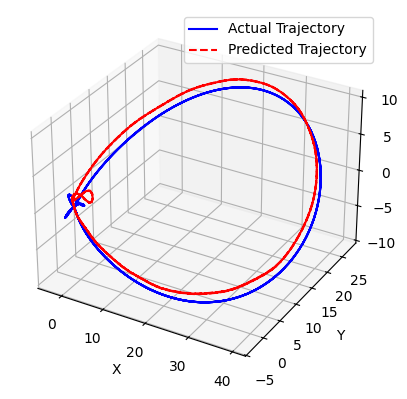

In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Load your data
pos, t = load_segment_data()
print(pos.shape)  # Should be [T, N, 3]
print(t.shape)    # Should be [T]

# Compute the discrete derivatives (velocities)
dt = np.diff(t).mean()
velocities = np.diff(pos, axis=0) / dt

# Print non-zero terms from Lasso regression
def print_equation(lasso, feature_names):
    non_zero_indices = np.where(lasso.coef_ != 0)[0]
    equation = " + ".join(
        f"{lasso.coef_[i]:.4f}*{feature_names[i]}"
        for i in non_zero_indices
    )
    print(f"Derived equation: dX = {equation}")

# Generate polynomial and trigonometric features
def generate_features(pos, max_degree=3):
    poly = PolynomialFeatures(degree=max_degree, include_bias=True)
    pos_flat = pos.reshape(-1, pos.shape[-1])
    
    # Generate polynomial features
    poly_features = poly.fit_transform(pos_flat)
    poly_feature_names = poly.get_feature_names_out(['X', 'Y', 'Z'])
    
    # Generate trigonometric features
    trig_features = np.hstack([np.sin(pos_flat), np.cos(pos_flat)])
    trig_feature_names = []
    for i, name in enumerate(['X', 'Y', 'Z']):
        trig_feature_names.append(f'sin({name})')
        trig_feature_names.append(f'cos({name})')
    
    # Combine polynomial and trigonometric features
    all_features = np.hstack([poly_features, trig_features])
    all_feature_names = np.concatenate([poly_feature_names, trig_feature_names])
    
    return all_features, all_feature_names


# Perform L1 regression (Lasso)
def lasso_regression(X_poly, dX, alpha=0.1):
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_poly, dX)
    return lasso

# Fit Lasso for each dimension
T, N, _ = pos.shape
X_poly, feature_names = generate_features(pos[:-1], max_degree=3)
models = []
for i in range(3):
    lasso = lasso_regression(X_poly, velocities[:, :, i].flatten(), alpha=0.01)
    models.append(lasso)
    print_equation(lasso, feature_names)

# Function to print the derived equation
def print_equation(lasso, feature_names):
    non_zero_indices = np.where(lasso.coef_ != 0)[0]
    equation = " + ".join(
        f"{lasso.coef_[i]:.4f}*{feature_names[i]}"
        for i in non_zero_indices
    )
    print(f"Derived equation: dX = {equation}")

# Predict and visualize the trajectory
def predict_trajectory(models, X_poly, pos, dt):
    # Predict velocities using the trained models
    predicted_velocities = np.column_stack([model.predict(X_poly) for model in models])
    predicted_velocities = predicted_velocities.reshape(-1, pos.shape[1], 3)  # Ensure correct shape

    # Multiply the predicted velocities by dt
    predicted_velocities *= dt

    # Expand dimensions of pos[0] to match the shape of predicted_velocities
    initial_pos = pos[0][np.newaxis, :, :]  # Shape (1, N, 3)

    # Concatenate initial positions and the time-scaled predicted velocities
    combined_positions = np.vstack([initial_pos, predicted_velocities])

    # Compute the cumulative sum to get the trajectory
    predicted_positions = np.cumsum(combined_positions, axis=0)

    return predicted_positions


predicted_positions = predict_trajectory(models, X_poly, pos, dt)

# Plotting the actual vs predicted trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos[:, 0, 0], pos[:, 0, 1], pos[:, 0, 2], label='Actual Trajectory', color='blue')
ax.plot(predicted_positions[:, 0, 0], predicted_positions[:, 0, 1], predicted_positions[:, 0, 2], 
        label='Predicted Trajectory', color='red', linestyle='dashed')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()


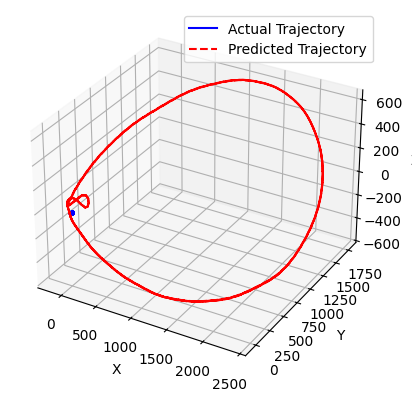

In [171]:
# Plotting the actual vs predicted trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos[:, 3, 0], pos[:, 3, 1], pos[:, 3, 2], label='Actual Trajectory', color='blue')
ax.plot(predicted_positions[:, 0, 0], predicted_positions[:, 0, 1], predicted_positions[:, 0, 2], 
        label='Predicted Trajectory', color='red', linestyle='dashed')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

In [173]:
# Create the animation
anim = animate_trefoil(predicted_positions, all_points, movie_length, fps=fps)

# To display in a Jupyter notebook or save to a file
from IPython.display import HTML
HTML(anim.to_jshtml())  # For Jupyter notebook
anim.save('trefoil_animation_sindy_predicted.mp4', fps=fps)

Animation size has reached 21044043 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [169]:
predicted_positions.shape

(500, 30, 3)

In [170]:
all_points.shape

(150, 3)